###  MULTIPLE LINEAR REGRESSION (advertising.csv)

#### importing libraries

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#### getting data set

In [2]:
df = pd.read_csv('datasets/Advertising.csv', index_col = 0)
cols = df.columns[:-1]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
#print(X[:, 1])
#print(df)

#### splitting the data set into train and test (70/30)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 9)

#### feature scaling

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#always fir_transform on training set and as testing set is unseen, we'll use transform to normalise
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### training MLR model on training set

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def trainModel(X, y, regressor):
    regressor.fit(X, y)
    B0 = regressor.intercept_.round(4)
    Bi = regressor.coef_.round(4)
    y_train_pred = regressor.predict(X)
    train_MSE = mean_squared_error(y_train, y_train_pred)
    print("intercept: {}".format(B0))
    print("coefficients: {}".format(Bi))
    return (B0, Bi, train_MSE, y_train_pred)
    
    

In [6]:
regressor = LinearRegression()
B0, Bi, train_MSE, y_train_pred = trainModel(X_train, y_train, regressor)



intercept: 13.8029
coefficients: [ 3.9516  2.6445 -0.0429]


#### using model to predict against the test data set

In [7]:
est_y = regressor.predict(X_test).round(2)
test_MSE = mean_squared_error(y_test, est_y)

#### calculating accuracy using R^2

In [8]:
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, regressor.predict(X_train).round(2)).round(4)
test_r2 = r2_score(y_test, est_y).round(4)
print("train MSE: {}\ntest MSE: {}\n".format(train_MSE, test_MSE))
print("train R^2: {}\ntest R^2: {}\n\n".format(train_r2, test_r2))

train MSE: 2.952755722412376
test MSE: 2.440201666666667

train R^2: 0.8934
test R^2: 0.9035




#### visualising train data set

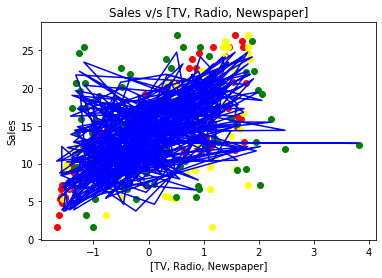

In [9]:

plt.scatter(X_train[:,0] , y_train, color = 'red')
plt.scatter(X_train[:,1] , y_train, color = 'yellow')
plt.scatter(X_train[:,2] , y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Sales v/s [TV, Radio, Newspaper]')
plt.xlabel('[TV, Radio, Newspaper]')
plt.ylabel("Sales")
plt.show()

#### visualising test data set

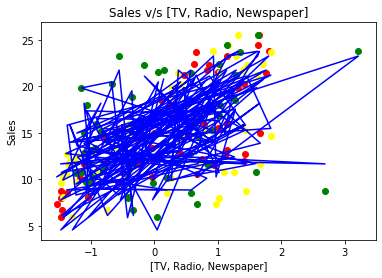

In [10]:

plt.scatter(X_test[:,0] , y_test, color = 'red')
plt.scatter(X_test[:,1] , y_test, color = 'yellow')
plt.scatter(X_test[:,2] , y_test, color = 'green')
plt.plot(X_test, est_y, color='blue')
plt.title('Sales v/s [TV, Radio, Newspaper]')
plt.xlabel('[TV, Radio, Newspaper]')
plt.ylabel("Sales")
plt.show()

#### plot of actual sales v/s predicted sales

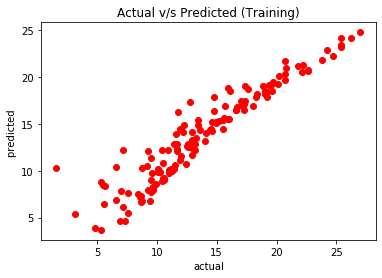

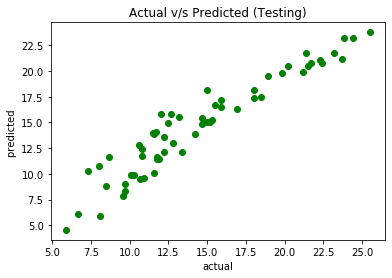

In [11]:
plt.scatter(y_train,regressor.predict(X_train), color = 'red')
plt.title('Actual v/s Predicted (Training)')
plt.xlabel('actual')
plt.ylabel("predicted ")
plt.show()

plt.scatter(y_test,regressor.predict(X_test), color = 'green')
plt.title('Actual v/s Predicted (Testing)')
plt.xlabel('actual')
plt.ylabel("predicted ")
plt.show()

#### Testing for heteroscedasticity

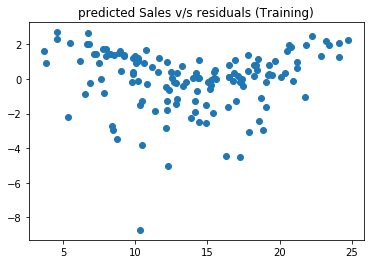

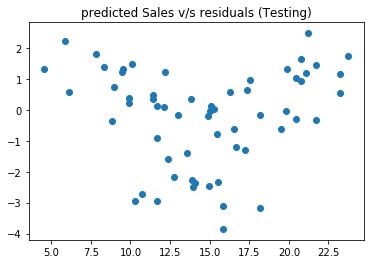

In [12]:
residual_train = y_train - regressor.predict(X_train)
residual_train = pd.Series(residual_train)
plt.scatter(regressor.predict(X_train), residual_train)
plt.title('predicted Sales v/s residuals (Training)')
plt.show()


residual_test = y_test - est_y
residual_test = pd.Series(residual_test)
plt.scatter(est_y, residual_test)
plt.title('predicted Sales v/s residuals (Testing)')
plt.show()

#### as a pattern is not visible on the plot (variance is n constant with increasing values), heteroscedasticity is absent

#### Detecting Outliers using z-score = (observation - mean)/standard deviation

In [13]:

def detect_outliers(x):
  outliers = {"TV":[], "Radio":[], "Newspaper":[]}
  #consider an outlier if it lies beyond 3rd standard deviation
  threshold = 3
  for i in range(len(cols)):
    mean = np.mean(x[:,i]).round(4)
    std = np.std(x[:,i]).round(4)

    for j in list(x[:,i]):
        zscore = (j - mean)/std
        if np.abs(zscore) > threshold:
            outliers[cols[i]].append(j)

  return outliers


In [14]:
outliers_train = detect_outliers(X_train)
outliers_test = detect_outliers(X_test)
print("outliers in the training data: {}".format(outliers_train))
print("outliers in the testing data: {}".format(outliers_test))

outliers in the training data: {'TV': [], 'Radio': [], 'Newspaper': [3.814293723258048]}
outliers in the testing data: {'TV': [], 'Radio': [], 'Newspaper': [3.214837470391175]}


### Regularization

In [15]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

def trainModel(X, y, regressor):
    regressor.fit(X, y)
    B0 = regressor.intercept_.round(4)
    Bi = regressor.coef_.round(4)
    y_train_pred = regressor.predict(X)
    train_MSE = mean_squared_error(y_train, y_train_pred)
    print("intercept: {}".format(B0))
    print("coefficients: {}".format(Bi))
    return (B0, Bi, train_MSE, y_train_pred)
    
    

In [16]:
rr = Ridge(alpha=0.3)
B0_rr, Bi_rr, train_MSE_rr, y_train_pred_rr = trainModel(X_train, y_train, rr)

lr = Lasso(alpha=0.3)
B0_lr, Bi_lr, train_MSE_lr, y_train_pred_lr = trainModel(X_train, y_train, lr)

intercept: 13.8029
coefficients: [ 3.9436  2.6389 -0.0406]
intercept: 13.8029
coefficients: [3.6795 2.36   0.    ]


#### predicting y using the trained ridge and lasso regression model

In [17]:

est_y_rr = rr.predict(X_test).round(2)
test_MSE_rr = mean_squared_error(y_test, est_y_rr)

est_y_lr = lr.predict(X_test).round(2)
test_MSE_lr = mean_squared_error(y_test, est_y_lr)

#### calculating R2 and MSE for train and test

In [18]:
from sklearn.metrics import r2_score

train_r2_rr = r2_score(y_train, rr.predict(X_train).round(2)).round(4)
test_r2_rr = r2_score(y_test, est_y_rr).round(4)

train_r2_lr = r2_score(y_train, lr.predict(X_train).round(2)).round(4)
test_r2_lr = r2_score(y_test, est_y_lr).round(4)

print("Ridge:\n\ttrain MSE: {}\n\ttest MSE: {}\n".format(train_MSE_rr, test_MSE_rr))
print("\ttrain R^2: {}\n\ttest R^2: {}\n".format(train_r2_rr, test_r2_rr))
    
print("Lasso:\n\ttrain MSE: {}\n\ttest MSE: {}\n".format(train_MSE_lr, test_MSE_lr))
print("\ttrain R^2: {}\n\ttest R^2: {}\n".format(train_r2_lr, test_r2_lr))

Ridge:
	train MSE: 2.95285470864253
	test MSE: 2.4419916666666666

	train R^2: 0.8934
	test R^2: 0.9034

Lasso:
	train MSE: 3.1170752534836943
	test MSE: 2.668376666666667

	train R^2: 0.8875
	test R^2: 0.8944

